#  Implementación de una técnica de aprendizaje máquina sin el uso de un framework

Autor: Roberto Valdez Jasso

Matricula: A01746863

Fecha de Inicio 30/08/2022

Fecha de Finalizacion: 2/09/2022

Entregable: Implementación de una técnica de aprendizaje máquina sin el uso de un framework.

1. Crea un repositorio de GitHub para este proyecto.


2. Programa uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice) sin usar ninguna biblioteca o framework de aprendizaje máquina, ni de estadística avanzada. Lo que se busca es que implementes 
manualmente el algoritmo, no que importes un algoritmo ya implementado. 

3. Prueba tu implementación con un set de datos y realiza algunas predicciones. Las predicciones las puedes correr en consola o las puedes implementar con una interfaz gráfica apoyándote en los visto en otros módulos.

4. Tu implementación debe de poder correr por separado solamente con un compilador, no debe de depender de un IDE o de un “notebook”. Por ejemplo, si programas en Python, tu implementación final se espera que esté en un archivo .py no en un Jupyter Notebook.

5. Después de la entrega intermedia se te darán correcciones que puedes incluir en tu entrega final.



# Modelo  de Inteligencia Artificial Elegido

El Modelo Elegido para esta actividad es: Regresion Logistica.



Nota:
En esta actividad usare  un codigo que ya realice en cursos anteriores realizados en Linkedin con la finalidad de ver y comparar el porcentaje de acercamiento del realizado con librerias como tambien los valores pruebas regresado con una semilla random diferente al anterior.

In [ ]:
# Librerias base para generar la la regresion Logistica 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import  seaborn as sb
from google.colab import drive
from  sklearn.preprocessing import  LabelEncoder
from  sklearn.preprocessing import  OneHotEncoder
from  sklearn.model_selection import train_test_split


In [ ]:
# Conexion con Drive para recibir los dataset del
drive.mount("/content/gdrive")  
!pwd  # show current path 

# Revision del los datos disponibles (csv) en la carpeta
%cd "/content/gdrive/MyDrive/Data/"
!ls  # show current directory

Mounted at /content/gdrive
/content
/content/gdrive/MyDrive/Data
Automobile.csv	     iris.names     purchases.json
IMDB-Movie-Data.csv  my_figure.png  titanic.csv
iris.data	     purchases.csv  weatherHistory.csv


In [ ]:
# Dataframe titanic

# Generamos la el Dataframe/Dataset 
# Con el csv de automobile csv

titanic_training = pd.read_csv('titanic.csv')

#Una vez ya creado, vemos los primeros 10  datos de la tabla
titanic_training.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Procesado de los datos disponibles

In [ ]:
#Revisamos la informacion del dataset titanico
titanic_training.info()

"""
Descripcion de las variables

Survived: Survival (0 = NO, 1= YES) (variable binaria)
pClass = Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Name = Name
Sex = Sex
Age = Age
SibSp = Number of Siblings/Spouses Aboard
Parch = Number of Parents/Chindren Aboard
Ticket = Number of Tickets
Fare = Passanger Fare (British Pound)
Cabin = Cabin
Embarked = Port of Embarkation ( C = Cherbour ,France;
                                 Q = Queenstown, UK;
                                 S = Southampton, Cobh- Ireland;                                            
                                ) variable categorica
"""


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:

# DATA PREPARATON

# para preparar los datos primero necetamos checar si la variable tarjet es binaria
# Queremos checar, probar y predecir la sobrevencia , pero primero hay que checar si es binario
#sb.countplot(x = "Survived", data = titanic_training, palette = 'hls')
#plt.show() # vemos la grafica de sobreviencia denotando que si es binaria la variable

# Checamos por valores perdidos
# Siempre hay que hacerlo (en este caso si hay valores perdidos , lo podemos checar desde la info del dataset)
titanic_training.isnull()
sum = titanic_training.isnull().sum()
sum

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Descricion de los datos
titanic_training.describe()
"""
Taking care of missing values
    Dropping missing values
    So let's just go ahead and drop all the variables that aren't relevant for predicting survival. We should at least keep the following:
    Survived - This variable is obviously relevant.
    Pclass - Does a passenger's class on the boat affect their survivability?
    Sex - Could a passenger's gender impact their survival rate?,
    Age - Does a person's age impact their survival rate?
    SibSp - Does the number of relatives on the boat (that are siblings or a spouse) affect a person survivability? Probability
    Parch - Does the number of relatives on the boat (that are children or parents) affect a person survivability? Probability
    Fare - Does the fare a person paid effect his survivability? Maybe - let's keep it.
    Embarked - Does a person's point of embarkation matter? It depends on how the boat was filled... Let's keep it

    What about a person's name, ticket number, and passenger ID number? They're irrelavant for predicting survivability.
    And as you recall, the cabin variable is almost all missing values, so we can just drop all of these.
"""

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Generamos un nuevo dataframe con la elimanacion de los campos anteriores
titanic_data = titanic_training.drop(['Name', 'Ticket', 'Cabin'], axis= 1) # tumbamos las columnas
titanic_data.head() # dataset limpio con datos relevantes

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


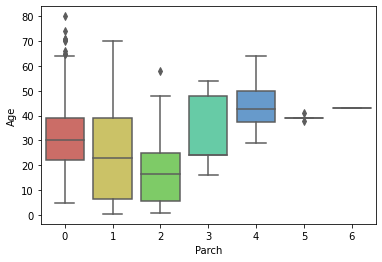

In [ ]:
# tratando con valores desaparecidos
# Agregamos los valores desaparecidos con aproximacion

# Primero checamos la distribuccion de los datos entre Parch y Age
sb.boxplot(x = "Parch",y= "Age", data = titanic_data, palette = 'hls')
plt.show() # podemos denotar que hay relaciones entre ambas variables, es decir, podemos ver  que puede haber dos relativos por bote
           # (mientras mas edad mauor cantidad hasta llegar poren encima de 40 años)


In [ ]:
# Aproximacion de las edades de los pasajeros en base al numero de padres o hijos que hay en el bote
# generamos un dataframe para la aproximacion

Parch_groups = titanic_data.groupby(titanic_data['Parch'])
Parch_groups.mean() # Sacamos la media de checar las edades
                            # por categoria tenemos la mediade las edades
                            # para las personas que tenga cero hijos o padres en el barco la edad promedio es de 32
                            # para las personas que tenga un hijo o padre en el barco la edad promedio es de 24
                            # para las personas que tenga dos hijos o padres en el barco la edad promedio es de 17
                            # para las personas que tenga tres hijos o padres en el barco la edad promedio es de 33
                            # para las personas que tenga cuatro hijos o padres en el barco la edad promedio es de 44
                            # para las personas que tenga cinco hijos o padres en el barco la edad promedio es de 39
                            # para las personas que tenga seis hijos o padres en el barco la edad promedio es de 43

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [ ]:
def age_aprox(cols):
    Age = cols[0]
    Parch = cols[1]
    # Checamos si  los valores esta vacios o no existen
    if pd.isnull(Age):
        # Si es asi usamos la aproximacion de grupos de hijos o padre por
        # media de edades de los pasajeros en el barco como esta arriba
        if Parch == 0:
            return 32
        elif Parch == 1:
            return  24
        elif Parch == 2:
            return  17
        elif Parch == 3:
            return  33
        elif Parch == 4:
            return  44
        else:
            return  39 # 5 hijos o padres
    else:
        return Age

# Agregamos los datos por aproximacion
titanic_data['Age'] = titanic_data[['Age', 'Parch']].apply(age_aprox, axis = 1)


In [ ]:
# Checamos que no haya vacios (cosa ya no habra)
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [ ]:
# tumbamos las filas pertenecientes a eso dos valores perdidos
titanic_data.dropna(inplace = True)
titanic_data.reset_index(inplace = True, drop= True)
#Revisamos la informacion del dataset
titanic_data.info() # imprimos la informacion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB


In [ ]:
# RE-ENCODE VARIABLES

# Covertiendo variables categoricas a indicadores dummy

# vamos a reformatear la variable sex y embarked a variables numericas

# Hacemos esto para que funcionen dentro del modelo

label_encoder = LabelEncoder() # llamamos al encoder
# convertimos el genero
gender_Cat = titanic_data['Sex']
gender_Encoder = label_encoder.fit_transform(gender_Cat) # encoder la seccion sex
gender_Encoder[0:5] # no sabemos que signifca 1 o 0
# creando un gender Dataframe
gender_DF = pd.DataFrame(gender_Encoder, columns= ['male_gender'])
gender_DF.head()


,male_gender
0,1
1,0
2,0
3,0
4,1


In [ ]:
# Ahora trabajaremos embarked
embarked_Cat = titanic_data['Embarked']
embarked_encoder=  label_encoder.fit_transform(embarked_Cat) # indicadores nuevos dummy

# hacemos lo siguiente para conseguir una variable binaria de embarked
# necesitamo one hot encoder
binary_encoder = OneHotEncoder( categories= 'auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoder.reshape(-1,1)) # genera un array de una sola columna pero la queremos en matrix
embarked_1hot_mat = embarked_1hot.toarray() # para matrix
embarked_DF  = pd.DataFrame(embarked_1hot_mat, columns= ['C', 'Q', 'S']) #de la matrix a dataframe, las columnas representas en donde embarcaron
embarked_DF.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [ ]:
# tiramos para abajo  las columnas ya no necesarias de Titanic data

titanic_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
# ahora concatenamos los nuevos indicadores a la tabla original
titanic_data_dmy = pd.concat([titanic_data,gender_DF,embarked_DF], axis= 1, verify_integrity= True).astype(float)
titanic_data_dmy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


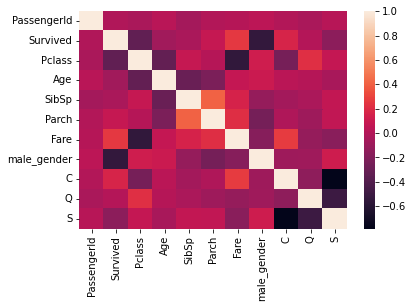

In [ ]:
# VALIDATING DATASET

# Checando por independecias entre atributos

plt.figure()
sb.heatmap(titanic_data_dmy.corr()) # corelacionamos los datos
plt.show() # Lo que nos dice la grafica que esu si tenemos corelacion cerca a uno o uno negtaivos, significa que
           # se obtuvo una fuerte relacion lineal entre el par de varaibles
           # regresion logistica asume que los atributos debe ser independiente del uno con el otro
           # lo cual no podemos tener esto

In [ ]:
# Fare y Plass no son independiente de uno y del otro vamos tumbarlas
titanic_data_dmy.drop(['Fare', 'Pclass'], axis= 1, inplace= True)
titanic_data_dmy.head() # datafame mas limpio


,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
# MODEL DEPLOYMENT
# Rompemos el dataframe para  el set entrenamiento (4/5 de datos del dataframe) y  set pruebas (pass set) (1/5 de datos del dataframe)
# y quitamos la variable Survived qque es la que queremos checar
X_train, X_test, Y_train, Y_test = train_test_split(titanic_data_dmy.drop(['Survived'], axis= 1), # Valores en X
                                                    titanic_data_dmy['Survived'], test_size = 0.2, # Valores en Y
                                                    random_state= 0) # seed de random para tener los mismos resultados

In [ ]:
#checando los resultados
print(f'Valores de entrenamiento en X :\n{X_train.shape} \nvalores en Y:\n {Y_train}') # En y tenemos una ifla con 711 datos y en
print("/------------------------------------/")

Valores de entrenamiento en X :
(711, 8) 
valores en Y:
 363    0.0
255    1.0
476    0.0
271    1.0
553    1.0
      ... 
835    0.0
192    1.0
629    1.0
559    0.0
684    0.0
Name: Survived, Length: 711, dtype: float64
/------------------------------------/


In [ ]:
#checando los resultados
print(f'Valores de entrenamiento predictores en X :\n{X_train[0:5]}')  #Checamos por los primeros 5 valores que usaramos como predictores
print("/------------------------------------/")

Valores de entrenamiento predictores en X :
     PassengerId   Age  SibSp  Parch  male_gender    C    Q    S
363        365.0  32.0    1.0    0.0          1.0  0.0  1.0  0.0
255        257.0  32.0    0.0    0.0          0.0  1.0  0.0  0.0
476        478.0  29.0    1.0    0.0          1.0  0.0  0.0  1.0
271        273.0  41.0    0.0    1.0          0.0  0.0  0.0  1.0
553        555.0  22.0    0.0    0.0          0.0  0.0  0.0  1.0
/------------------------------------/


# Generacion del Modelo de aprendizaje

Debido a la actividad, en este codigo se encontraran el  codigo necesario para realizar la regresion Logistica sin librerias de IA y estadisticas avanzadas

In [ ]:
# Regresion Logistica a "mano"

#Clase Regresion Logistica

class LogitRegression() :
    def __init__( self, learning_rate, epochs ) :        
        self.learning_rate = learning_rate # ratio de aprendizaje        
        self.epochs = epochs # interaciones del modelo 
            
    # Funcion fit 
    # Nos apoya generando el modelo para entrenar la regresion logistica
    # como tambien realizarla.
    def fit( self, X, Y ) :        
        # Variables iniciales       
        self.m, self.n = X.shape  # toman en tamaño (shape) de los datos de entrenamiento en  
                                  # Estos deben ser de manera obligatoria datos de entrenamiento
                                  # y no de los de preuba, en caso contrario no funcionara el
                                  # modelo.    
        # Inicializacion de los pesos       
        self.W = np.zeros( self.n )  # peso inicial      
        self.b = 0  #  Bias inicial    
        self.X = X  # Datos de entrenamiento en X  (vector)     
        self.Y = Y  # Datos de entrenamiento en Y
          
        # Ciclo for para generar el aprendizaje
        # del gradiente descendiente.
        # se genera por las epocas decidas por el usuario          
        for i in range( self.epochs ) :            
            self.calculate_weights()  # Caluclo constante de los pesos          
        return self
      
    # Funcion calculate weights
    # Funcion que nos apoya en generar los pesos
    # al momento de calcular el gradiente descendiente 
    def calculate_weights( self ) :          
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) ) # Alfa (aprendizaje)
        # Se calculan el gradiente desencidiente       
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m          
        db = np.sum( tmp ) / self.m 
        # se actualizan los nuevos pesos con el ratio de aprendizaje   
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self # regresamos la carga nueva de pesos 
      
    # Funcion Predict
    # Genera la prediccion del modelo, en base a la formula
    # de funcion hipotetica.  
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )  # sigmoide       
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y # regresamos la prediccion
  

  


In [ ]:
# Llamando al modelo   
# Model training    
model = LogitRegression( learning_rate = 0.01, epochs = 100000 ) # Si Funciona pero necesita muchas MUCHAS Interaciones como tambien el      
model.fit( X_train, Y_train )  # tarda su rato dependiendo las epocas y el ratio de apredizaje que se le ponga   
    
# Prediction on test set
Y_pred = model.predict( X_test )    
      
print(f'Prediccion Modelo realizado:\n {Y_pred}')  #Checamos por los primeros 5 valores que usaramos como predictores
print("/------------------------------------/")

Prediccion Modelo realizado:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
/------------------------------------/


In [ ]:
# Librerias para ver el modelo con libreria
from  sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings( "ignore" )

In [ ]:
#modelo con libreria 
# Realizamos este modelo para ver la  realizacion del modelo generado
# para la actividad como tambien la precision de ambos modelos
model1 = LogisticRegression()    
model1.fit( X_train, Y_train)
Y_pred1 = model1.predict( X_test )
print(f'Prediccion con Libreria :\n {Y_pred1}')  # con facilidad podemos decir que esta es mas rapida
print("/------------------------------------/")      

Prediccion con Libreria :
 [1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
/------------------------------------/


In [ ]:
# Librerias que nos apoya para generar reportes de clasificacion
# generar
from  sklearn.metrics import  classification_report

In [ ]:
# Reporte de Clasificacion  sin cross validation del modelo generado
print(f'Reporte de clasificacion sin crossvalidation :\n {classification_report(Y_test, Y_pred)}') # vemos 43 de presicion de predicion que nada bueno pero puede mejorar
                                                                                                   # modificando el learning ratio y las epocas realizadas
print("/------------------------------------/")

Reporte de clasificacion sin crossvalidation :
               precision    recall  f1-score   support

         0.0       0.83      0.05      0.09       105
         1.0       0.42      0.99      0.59        73

    accuracy                           0.43       178
   macro avg       0.63      0.52      0.34       178
weighted avg       0.66      0.43      0.29       178

/------------------------------------/


In [ ]:
# Reporte de Clasificacion  sin cross validation del modelo con libreria
print(f'Reporte de clasificacion  :\n {classification_report(Y_test, Y_pred1)}') # vemos 72 de presicion de predicion que si decente pero puede mejorar
print("/------------------------------------/")

Reporte de clasificacion  :
               precision    recall  f1-score   support

         0.0       0.74      0.81      0.77       105
         1.0       0.68      0.59      0.63        73

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.72       178

/------------------------------------/
